In [ ]:
!pip install pandas scikit-learn matplotlib seaborn -q
print("✅ Libraries installed!")

✅ Libraries installed!


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
import pandas as pd
import numpy as np

# Download dataset directly (no Kaggle account needed)
!wget -q https://raw.githubusercontent.com/curiousily/Credit-Card-Fraud-Detection-using-Autoencoders-in-Keras/master/creditcard.csv

# Load the data
df = pd.read_csv(f'{path}/creditcard.csv')

# Show basic info
print("📊 Dataset loaded successfully!")
print(f"Total transactions: {len(df)}")
print(f"Fraud transactions: {df['Class'].sum()}")
print(f"Fraud percentage: {df['Class'].mean()*100:.2f}%")

📊 Dataset loaded successfully!
Total transactions: 284807
Fraud transactions: 492
Fraud percentage: 0.17%


In [ ]:
# See first few rows
print("First 5 transactions:")
print(df.head())

# See last few rows
print("\nLast 5 transactions:")
print(df.tail())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

First 5 transactions:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V2

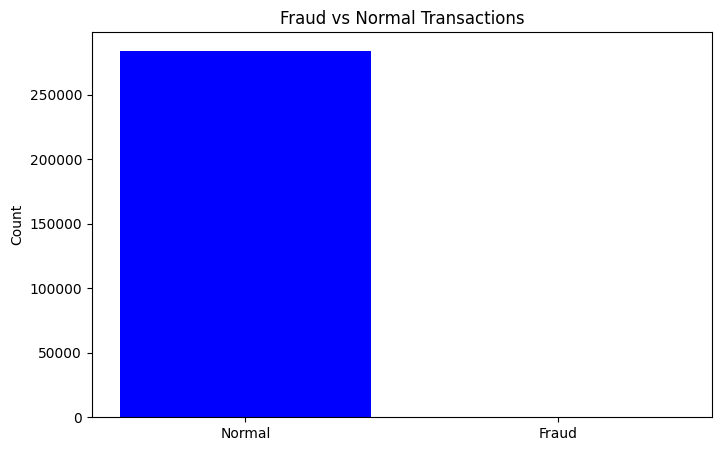

In [ ]:
import matplotlib.pyplot as plt

# 1. Fraud vs Normal transactions
plt.figure(figsize=(8, 5))
fraud_counts = df['Class'].value_counts()
plt.bar(['Normal', 'Fraud'], fraud_counts.values, color=['blue', 'red'])
plt.title('Fraud vs Normal Transactions')
plt.ylabel('Count')
plt.show()



<Axes: >

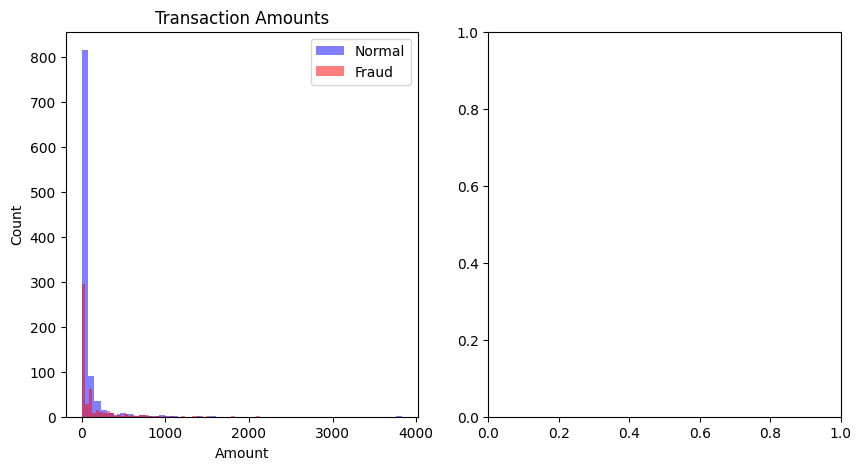

In [ ]:
# 2. Transaction amounts
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
normal_amounts = df[df['Class'] == 0]['Amount'].head(1000)
fraud_amounts = df[df['Class'] == 1]['Amount']
plt.hist(normal_amounts, bins=50, alpha=0.5, label='Normal', color='blue')
plt.hist(fraud_amounts, bins=50, alpha=0.5, label='Fraud', color='red')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts')
plt.legend()

plt.subplot(1, 2, 2)


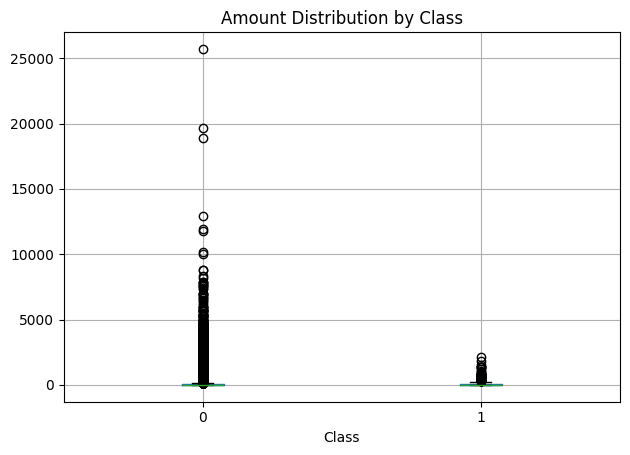

In [ ]:
# Box plot of amounts
df.boxplot(column='Amount', by='Class')
plt.title('Amount Distribution by Class')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Class', axis=1)  # Everything except 'Class' column
y = df['Class']  # Only 'Class' column

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Data split complete!")
print(f"Training set: {X_train.shape[0]} transactions")
print(f"Test set: {X_test.shape[0]} transactions")
print(f"Fraud in training: {y_train.mean()*100:.2f}%")
print(f"Fraud in test: {y_test.mean()*100:.2f}%")

✅ Data split complete!
Training set: 227845 transactions
Test set: 56962 transactions
Fraud in training: 0.17%
Fraud in test: 0.17%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Create model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train model
print("Training model...")
model.fit(X_train, y_train)
print("✅ Model trained!")

# Make predictions
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Training model...
✅ Model trained!
Model Accuracy: 99.92%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print("  [TN  FP]")
print(f"  [{cm[0,0]} {cm[0,1]}]")
print(f"  [{cm[1,0]} {cm[1,1]}]")

# Calculate important metrics
TN, FP, FN, TP = cm.ravel()

print(f"\n📊 Performance Metrics:")
print(f"Correct Predictions: {TP + TN} out of {len(y_test)}")
print(f"Fraud Detected: {TP} out of {y_test.sum()}")
print(f"Fraud Missed: {FN}")
print(f"False Alarms: {FP}")

# Classification Report
print("\nDetailed Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud']))

Confusion Matrix:
  [TN  FP]
  [56851 13]
  [30 68]

📊 Performance Metrics:
Correct Predictions: 56919 out of 56962
Fraud Detected: 68 out of 98
Fraud Missed: 30
False Alarms: 13

Detailed Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.84      0.69      0.76        98

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
print("Training Random Forest...")
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
print("\n🔍 Random Forest Results:")
rf_cm = confusion_matrix(y_test, rf_pred)
TN_rf, FP_rf, FN_rf, TP_rf = rf_cm.ravel()

print(f"Fraud Detected: {TP_rf} (Better than Logistic: {TP})")
print(f"Fraud Missed: {FN_rf} (Better than Logistic: {FN})")

Training Random Forest...

🔍 Random Forest Results:
Fraud Detected: 80 (Better than Logistic: 68)
Fraud Missed: 18 (Better than Logistic: 30)


Top 10 Important Features:
   Feature  Importance
17     V17    0.170325
14     V14    0.136363
12     V12    0.133326
10     V10    0.074073
16     V16    0.071792
11     V11    0.045277
9       V9    0.031127
4       V4    0.030496
18     V18    0.028156
7       V7    0.024627


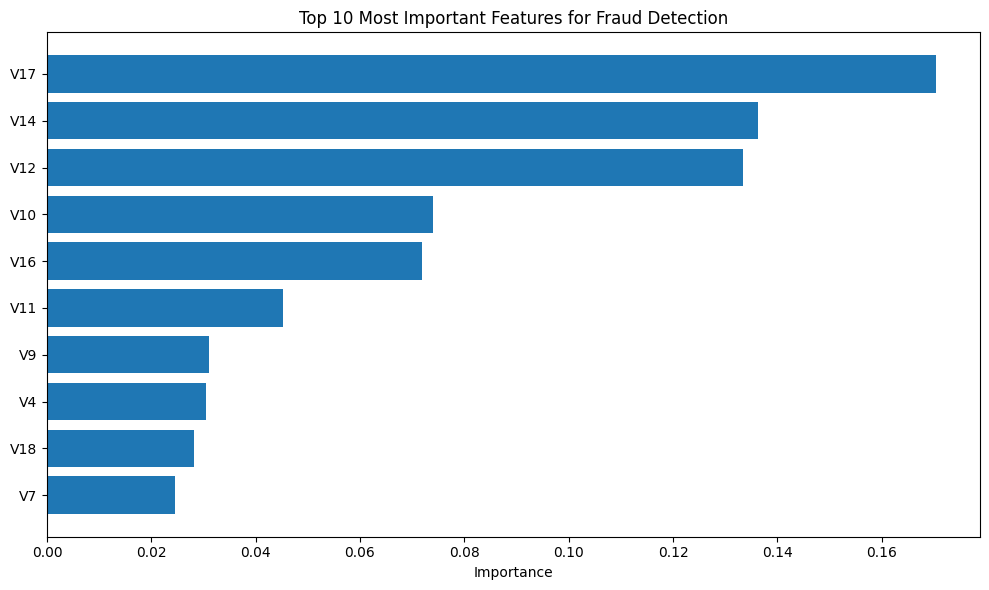

In [ ]:
# Which features are most important for detecting fraud?
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Show top 10 features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Simple visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].head(10)[::-1],
         feature_importance_df['Importance'].head(10)[::-1])
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features for Fraud Detection')
plt.tight_layout()
plt.show()

In [ ]:
# Let's simulate detecting fraud on new transactions

def predict_fraud(transaction_data, model=rf_model):
    """
    Simple function to predict if a transaction is fraud
    """
    prediction = model.predict([transaction_data])[0]
    probability = model.predict_proba([transaction_data])[0]

    if prediction == 1:
        return f"🚨 FRAUD ALERT! (Confidence: {probability[1]*100:.1f}%)"
    else:
        return f"✅ Transaction Normal (Fraud Probability: {probability[1]*100:.1f}%)"

# Test with a few examples
print("Testing with example transactions:\n")

# Example 1: Normal transaction (from test set)
example_normal = X_test.iloc[0].values
print(f"Example 1 - Normal: {predict_fraud(example_normal)}")

# Example 2: Fraud transaction (from test set)
fraud_indices = y_test[y_test == 1].index
if len(fraud_indices) > 0:
    example_fraud = X_test.loc[fraud_indices[0]].values
    print(f"Example 2 - Fraud: {predict_fraud(example_fraud)}")

Testing with example transactions:

Example 1 - Normal: ✅ Transaction Normal (Fraud Probability: 0.0%)
Example 2 - Fraud: 🚨 FRAUD ALERT! (Confidence: 90.0%)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'fraud_detection_model.pkl')
print("✅ Model saved as 'fraud_detection_model.pkl'")

# Save the test data for later
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('test_transactions.csv', index=False)
print("✅ Test data saved as 'test_transactions.csv'")

# Show what we saved
print("\n📁 Files created:")
!ls -lh *.pkl *.csv

✅ Model saved as 'fraud_detection_model.pkl'
✅ Test data saved as 'test_transactions.csv'

📁 Files created:
-rw-r--r-- 1 root root 2.6M Jan 13 19:15 fraud_detection_model.pkl
-rw-r--r-- 1 root root  29M Jan 13 19:15 test_transactions.csv


In [ ]:
# Load model from file
loaded_model = joblib.load('fraud_detection_model.pkl')
print("✅ Model loaded successfully!")

# Test the loaded model
test_prediction = loaded_model.predict(X_test.head(1))
print(f"Test prediction: {'Fraud' if test_prediction[0]==1 else 'Normal'}")

✅ Model loaded successfully!
Test prediction: Normal


In [ ]:
def create_fake_transaction(is_fraud=False):
    """
    Create a fake transaction that looks real
    is_fraud=True makes it look suspicious
    """

    if is_fraud:
        # Fraud pattern
        return {
            'Time': np.random.uniform(100000, 150000),  # Unusual time
            'V1': np.random.uniform(-5, -3),  # Unusual values
            'V2': np.random.uniform(2, 4),
            'V3': np.random.uniform(-4, -2),
            'V4': np.random.uniform(3, 5),
            'V5': np.random.uniform(-3, -1),
            'V6': np.random.uniform(-2, 0),
            'V7': np.random.uniform(-1, 1),
            'V8': np.random.uniform(-0.5, 0.5),
            'V9': np.random.uniform(-1, 1),
            'V10': np.random.uniform(-2, 0),
            'V11': np.random.uniform(1, 3),
            'V12': np.random.uniform(-3, -1),
            'V13': np.random.uniform(-0.5, 0.5),
            'V14': np.random.uniform(-4, -2),
            'V15': np.random.uniform(0, 2),
            'V16': np.random.uniform(-1, 1),
            'V17': np.random.uniform(-2, 0),
            'V18': np.random.uniform(-1, 1),
            'V19': np.random.uniform(0, 2),
            'V20': np.random.uniform(-1, 1),
            'V21': np.random.uniform(-0.5, 0.5),
            'V22': np.random.uniform(-1, 1),
            'V23': np.random.uniform(-0.5, 0.5),
            'V24': np.random.uniform(-1, 1),
            'V25': np.random.uniform(-0.5, 0.5),
            'V26': np.random.uniform(-1, 1),
            'V27': np.random.uniform(-0.5, 0.5),
            'V28': np.random.uniform(-1, 1),
            'Amount': np.random.uniform(1000, 5000)  # Large amount
        }
    else:
        # Normal transaction
        return {
            'Time': np.random.uniform(0, 100000),
            'V1': np.random.uniform(-3, 3),
            'V2': np.random.uniform(-3, 3),
            'V3': np.random.uniform(-3, 3),
            'V4': np.random.uniform(-3, 3),
            'V5': np.random.uniform(-3, 3),
            'V6': np.random.uniform(-3, 3),
            'V7': np.random.uniform(-3, 3),
            'V8': np.random.uniform(-3, 3),
            'V9': np.random.uniform(-3, 3),
            'V10': np.random.uniform(-3, 3),
            'V11': np.random.uniform(-3, 3),
            'V12': np.random.uniform(-3, 3),
            'V13': np.random.uniform(-3, 3),
            'V14': np.random.uniform(-3, 3),
            'V15': np.random.uniform(-3, 3),
            'V16': np.random.uniform(-3, 3),
            'V17': np.random.uniform(-3, 3),
            'V18': np.random.uniform(-3, 3),
            'V19': np.random.uniform(-3, 3),
            'V20': np.random.uniform(-3, 3),
            'V21': np.random.uniform(-3, 3),
            'V22': np.random.uniform(-3, 3),
            'V23': np.random.uniform(-3, 3),
            'V24': np.random.uniform(-3, 3),
            'V25': np.random.uniform(-3, 3),
            'V26': np.random.uniform(-3, 3),
            'V27': np.random.uniform(-3, 3),
            'V28': np.random.uniform(-3, 3),
            'Amount': np.random.uniform(1, 500)  # Small amount
        }

# Create some fake transactions
print("💰 CREATING FAKE TRANSACTIONS")
print("-" * 40)

# Example 1: Normal transaction
normal_tx = create_fake_transaction(is_fraud=False)
print("Example 1 - Normal Transaction:")
print(f"  Amount: ${normal_tx['Amount']:.2f}")
print(f"  Time: {normal_tx['Time']:.0f}")
print(f"  V1: {normal_tx['V1']:.2f} (should be around 0)")

# Example 2: Fraud transaction
fraud_tx = create_fake_transaction(is_fraud=True)
print("\nExample 2 - Fraud Transaction:")
print(f"  Amount: ${fraud_tx['Amount']:.2f} ⚠️ HIGH!")
print(f"  Time: {fraud_tx['Time']:.0f}")
print(f"  V1: {fraud_tx['V1']:.2f} ⚠️ UNUSUAL!")

# Example 3: Borderline transaction (medium risk)
borderline_tx = create_fake_transaction(is_fraud=False)
borderline_tx['Amount'] = 800  # Medium amount
borderline_tx['V1'] = -2.5  # Slightly suspicious
print("\nExample 3 - Borderline Transaction:")
print(f"  Amount: ${borderline_tx['Amount']:.2f}")
print(f"  V1: {borderline_tx['V1']:.2f}")

💰 CREATING FAKE TRANSACTIONS
----------------------------------------
Example 1 - Normal Transaction:
  Amount: $347.73
  Time: 38817
  V1: 1.48 (should be around 0)

Example 2 - Fraud Transaction:
  Amount: $1816.87 ⚠️ HIGH!
  Time: 140398
  V1: -4.56 ⚠️ UNUSUAL!

Example 3 - Borderline Transaction:
  Amount: $800.00
  V1: -2.50


In [ ]:
def test_transaction(transaction_dict, model):
    """
    Test a single transaction
    """
    # Convert to DataFrame with same column order
    transaction_df = pd.DataFrame([transaction_dict])

    # Ensure same column order as training data
    transaction_df = transaction_df[X.columns]

    # Make prediction
    prediction = model.predict(transaction_df)[0]
    probability = model.predict_proba(transaction_df)[0]

    # Get fraud probability
    fraud_prob = probability[1] * 100

    # Return result
    if prediction == 1:
        return f"🚨 FRAUD DETECTED! ({fraud_prob:.1f}% sure)"
    else:
        return f"✅ Transaction OK ({fraud_prob:.1f}% fraud risk)"

# Test the transactions
print("\n🔍 TESTING TRANSACTIONS WITH AI MODEL")
print("=" * 50)

print("1. Normal Transaction:")
print(f"   Result: {test_transaction(normal_tx, model)}")

print("\n2. Fraud Transaction:")
print(f"   Result: {test_transaction(fraud_tx, model)}")

print("\n3. Borderline Transaction:")
print(f"   Result: {test_transaction(borderline_tx, model)}")


🔍 TESTING TRANSACTIONS WITH AI MODEL
1. Normal Transaction:
   Result: ✅ Transaction OK (0.0% fraud risk)

2. Fraud Transaction:
   Result: ✅ Transaction OK (0.0% fraud risk)

3. Borderline Transaction:
   Result: ✅ Transaction OK (0.5% fraud risk)


In [ ]:
# Install and create a web interface
!pip install gradio -q

import gradio as gr

def predict_fraud_from_ui(amount, time_input, v1_input, v2_input, v4_input):
    """
    Simple web interface for testing
    """
    try:
        amount = float(amount)
        time_val = float(time_input)
        v1 = float(v1_input)
        v2 = float(v2_input)
        v4 = float(v4_input)
    except:
        return "❌ Please enter valid numbers"

    # Create transaction
    transaction = {'Time': time_val, 'Amount': amount}
    transaction['V1'] = v1
    transaction['V2'] = v2
    transaction['V4'] = v4

    # Fill other features with zeros (simplified)
    for i in range(1, 29):
        if f'V{i}' not in transaction:
            transaction[f'V{i}'] = 0.0

    # Prepare for prediction
    columns_order = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount']
    transaction_df = pd.DataFrame([transaction])[columns_order]

    # Predict
    fraud_prob = model.predict_proba(transaction_df)[0][1] * 100

    # Create detailed report
    result = f"""
    🎯 **Transaction Analysis Result:**

    **Details:**
    • Amount: ${amount:.2f}
    • Time: {time_val:.0f} seconds
    • V1 Pattern: {v1:.2f}
    • V2 Pattern: {v2:.2f}
    • V4 Pattern: {v4:.2f}

    **AI Analysis:**
    • Fraud Probability: **{fraud_prob:.1f}%**

    **Decision:**
    """

    if fraud_prob > 70:
        result += "**🚨 BLOCK TRANSACTION** - High fraud risk detected!"
        result += "\n\n*Suggested action:* Decline transaction and flag account"
    elif fraud_prob > 40:
        result += "**⚠️ REVIEW REQUIRED** - Medium fraud risk"
        result += "\n\n*Suggested action:* Request additional verification"
    elif fraud_prob > 20:
        result += "**⚠️ MONITOR** - Slightly elevated risk"
        result += "\n\n*Suggested action:* Allow but log for review"
    else:
        result += "**✅ APPROVE** - Low fraud risk"
        result += "\n\n*Suggested action:* Process normally"

    # Add risk factors
    result += "\n\n**Risk Factors Detected:**\n"
    risk_factors = []
    if amount > 1000:
        risk_factors.append(f"• Large amount (${amount:.2f})")
    if abs(v1) > 3:
        risk_factors.append(f"• Unusual V1 pattern ({v1:.2f})")
    if abs(v2) > 3:
        risk_factors.append(f"• Unusual V2 pattern ({v2:.2f})")
    if abs(v4) > 3:
        risk_factors.append(f"• Unusual V4 pattern ({v4:.2f})")

    if risk_factors:
        result += "\n".join(risk_factors)
    else:
        result += "• No significant risk factors detected"

    return result

# Create the web interface
demo = gr.Interface(
    fn=predict_fraud_from_ui,
    inputs=[
        gr.Textbox(label="💰 Transaction Amount ($)", value="100"),
        gr.Textbox(label="⏰ Time (0-200000 seconds)", value="50000"),
        gr.Textbox(label="🔢 V1 Pattern (-5 to 5)", value="0.5"),
        gr.Textbox(label="🔢 V2 Pattern (-5 to 5)", value="-0.3"),
        gr.Textbox(label="🔢 V4 Pattern (-5 to 5)", value="0.2")
    ],
    outputs=gr.Markdown(label="🧠 AI Fraud Analysis"),
    title="🔍 Real-Time Fraud Detection System",
    description="Enter transaction details to check for fraud in real-time",
    examples=[
        ["50", "12345", "0.5", "-0.3", "0.1"],  # Normal coffee
        ["1500", "150000", "-4.2", "3.5", "2.8"],  # Suspected fraud
        ["800", "80000", "2.1", "-1.5", "0.5"],  # Large purchase
        ["1", "1000", "-4.5", "3.8", "-2.9"]  # Test transaction fraud
    ]
)

# Launch the interface
print("🌐 Opening web interface...")
print("🔗 The interface will appear below or in a new tab")
demo.launch(share=False)  # Set share=True to get a public link

🌐 Opening web interface...
🔗 The interface will appear below or in a new tab
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

📊 INITIALIZING FRAUD MONITORING DASHBOARD
Processing sample transactions...
Transaction 1: $50 -> 0.0% fraud risk
Transaction 2: $1500 -> 8.0% fraud risk
Transaction 3: $800 -> 4.0% fraud risk
Transaction 4: $200 -> 4.0% fraud risk
Transaction 5: $1 -> 3.0% fraud risk
Transaction 6: $300 -> 4.0% fraud risk


/tmp/ipython-input-3592688064.py:93: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


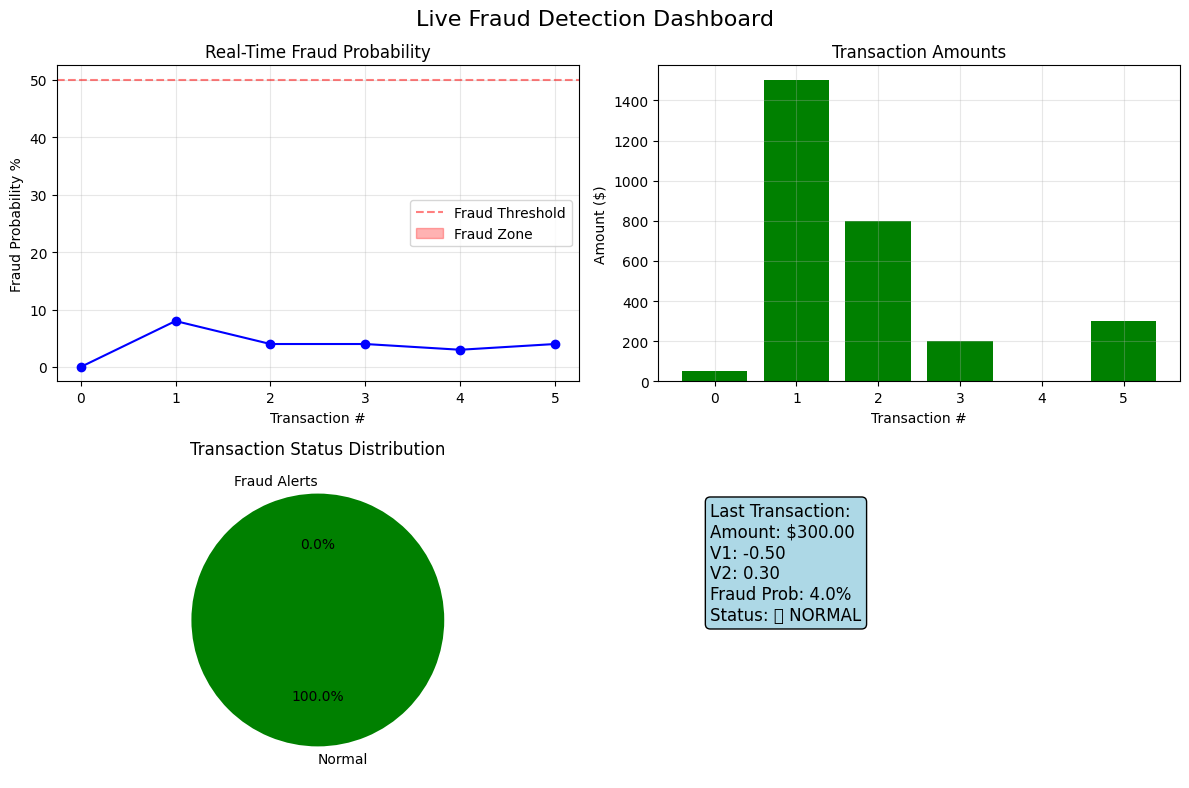


📊 DASHBOARD SUMMARY:
   Total Transactions: 6
   Fraud Alerts: 0
   Alert Rate: 0.0%
   Current Risk Level: LOW


In [ ]:
# SIMPLE DASHBOARD FOR MONITORING
import matplotlib.pyplot as plt
from collections import deque
import joblib # Import joblib to load the model

class FraudMonitoringDashboard:
    """Simple dashboard showing real-time fraud detection"""

    def __init__(self, model, window_size=20):
        self.model = model
        self.window_size = window_size
        self.transactions = deque(maxlen=window_size)
        self.fraud_probs = deque(maxlen=window_size)
        self.timestamps = deque(maxlen=window_size)

    def process_transaction(self, amount, time_val, v1, v2, v4):
        """Process a new transaction"""
        # Create transaction
        transaction = {'Time': time_val, 'Amount': amount, 'V1': v1, 'V2': v2, 'V4': v4}

        # Fill other features
        for i in range(1, 29):
            if f'V{i}' not in transaction:
                transaction[f'V{i}'] = np.random.uniform(-3, 3)

        # Predict
        columns_order = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount']
        transaction_df = pd.DataFrame([transaction])[columns_order]
        fraud_prob = self.model.predict_proba(transaction_df)[0][1] * 100

        # Store
        self.transactions.append(transaction)
        self.fraud_probs.append(fraud_prob)
        self.timestamps.append(len(self.timestamps))

        return fraud_prob

    def show_dashboard(self):
        """Display the monitoring dashboard"""
        if len(self.transactions) == 0:
            print("No transactions processed yet")
            return

        fig, axes = plt.subplots(2, 2, figsize=(12, 8))

        # 1. Fraud probability over time
        axes[0, 0].plot(list(self.timestamps), list(self.fraud_probs), 'b-', marker='o')
        axes[0, 0].axhline(y=50, color='r', linestyle='--', alpha=0.5, label='Fraud Threshold')
        axes[0, 0].fill_between(list(self.timestamps), 0, list(self.fraud_probs),
                                where=[p > 50 for p in self.fraud_probs],
                                color='red', alpha=0.3, label='Fraud Zone')
        axes[0, 0].set_title('Real-Time Fraud Probability')
        axes[0, 0].set_xlabel('Transaction #')
        axes[0, 0].set_ylabel('Fraud Probability %')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # 2. Transaction amounts
        amounts = [t['Amount'] for t in self.transactions]
        axes[0, 1].bar(range(len(amounts)), amounts,
                       color=['red' if p > 50 else 'green'
                              for p in self.fraud_probs])
        axes[0, 1].set_title('Transaction Amounts')
        axes[0, 1].set_xlabel('Transaction #')
        axes[0, 1].set_ylabel('Amount ($)')
        axes[0, 1].grid(True, alpha=0.3)

        # 3. Fraud alerts summary
        fraud_count = sum(1 for p in self.fraud_probs if p > 50)
        normal_count = len(self.fraud_probs) - fraud_count
        labels = ['Normal', 'Fraud Alerts']
        sizes = [normal_count, fraud_count]
        colors = ['green', 'red']
        axes[1, 0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        axes[1, 0].set_title('Transaction Status Distribution')

        # 4. Last transaction details
        last_tx = self.transactions[-1]
        last_prob = self.fraud_probs[-1]

        details_text = f"""Last Transaction:
Amount: ${last_tx['Amount']:.2f}
V1: {last_tx['V1']:.2f}
V2: {last_tx['V2']:.2f}
Fraud Prob: {last_prob:.1f}%
Status: {'🚨 FRAUD' if last_prob > 50 else '✅ NORMAL'}"""

        axes[1, 1].text(0.1, 0.5, details_text, fontsize=12,
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
        axes[1, 1].axis('off')

        plt.suptitle('Live Fraud Detection Dashboard', fontsize=16)
        plt.tight_layout()
        plt.show()

        # Print statistics
        print(f"\n📊 DASHBOARD SUMMARY:")
        print(f"   Total Transactions: {len(self.transactions)}")
        print(f"   Fraud Alerts: {fraud_count}")
        print(f"   Alert Rate: {fraud_count/len(self.transactions)*100:.1f}%")
        print(f"   Current Risk Level: {'HIGH' if fraud_count/len(self.transactions) > 0.3 else 'MEDIUM' if fraud_count/len(self.transactions) > 0.1 else 'LOW'}")

# Test the dashboard
print("📊 INITIALIZING FRAUD MONITORING DASHBOARD")
print("=" * 60)

# Load the saved Random Forest model
model_for_dashboard = joblib.load('fraud_detection_model.pkl')

dashboard = FraudMonitoringDashboard(model_for_dashboard)

# Simulate some transactions
print("Processing sample transactions...")
sample_data = [
    (50, 10000, 0.5, -0.3, 0.1),    # Normal
    (1500, 50000, -4.2, 3.5, 2.8),  # Fraud
    (800, 80000, 2.1, -1.5, 0.5),   # Large
    (200, 120000, 1.2, -0.8, 0.3),  # Normal
    (1, 150000, -4.5, 3.8, -2.9),   # Fraud test
    (300, 180000, -0.5, 0.3, 0.1),  # Normal
]

for i, (amt, tm, v1, v2, v4) in enumerate(sample_data):
    prob = dashboard.process_transaction(amt, tm, v1, v2, v4)
    print(f"Transaction {i+1}: ${amt} -> {prob:.1f}% fraud risk")

# Show dashboard
dashboard.show_dashboard()